In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [58]:
image = mpimg.imread('test.jpg')

In [59]:
ysize = image.shape[0]
xsize = image.shape[1]

In [60]:
color_select = np.copy(image)
line_image = np.copy(image)

In [61]:
# red_threshold = 50
# green_threshold = 50
# black_threshold = 50

red_threshold = 200
green_threshold = 200
black_threshold = 200

rgb_threshold = [red_threshold, green_threshold, black_threshold]

In [62]:
color_thresholds = (image[:, :, 0] < rgb_threshold[0]) | (image[:, :, 1] < rgb_threshold[1]) | (image[:, :, 2] < rgb_threshold[2])

In [63]:
left_bottom = [0, 539]  # 1st is x-axis (horizional axis), 2nd is y-axis (vertical axis)
right_bottom = [959, 539]
apex = [480, 300]

In [64]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_left

array([-4.97916667e-01,  5.39000000e+02])

In [65]:
fit_left[0] * 0 + fit_left[1]

538.9999999999998

In [66]:
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_right

array([ 0.49895616, 60.50104384])

In [67]:
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
fit_bottom

array([-6.8544098e-17,  5.3900000e+02])

In [68]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [69]:
region_thresholds = (YY > fit_left[0] * XX + fit_left[1]) &  (YY > fit_right[0] * XX + fit_right[1]) &  (YY < fit_bottom[0] * XX + fit_bottom[1])
region_thresholds

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [70]:
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]

In [71]:
line_image[(~color_thresholds) & region_thresholds] = [255, 0, 0]

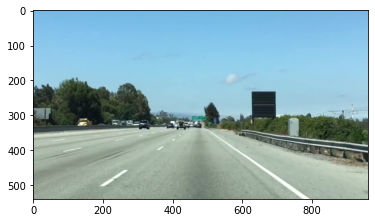

In [72]:
plt.imshow(image)

In [73]:
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
x

[0, 959, 480, 0]

In [74]:
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
y

[539, 539, 300, 539]

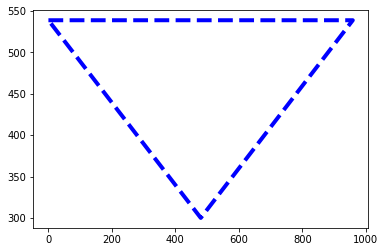

In [75]:
plt.plot(x, y, 'b--', lw=4)

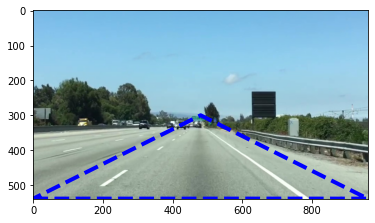

In [76]:
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)

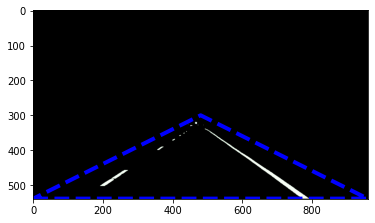

In [77]:
plt.imshow(color_select)
plt.plot(x, y, 'b--', lw=4)

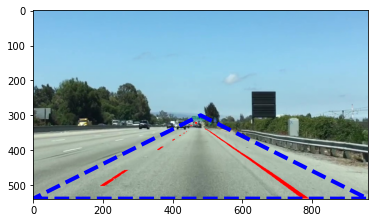

In [78]:
plt.imshow(line_image)
plt.plot(x, y, 'b--', lw=4)

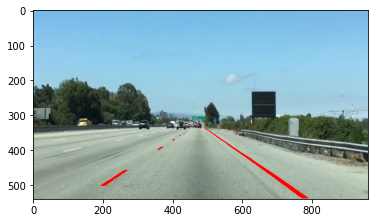

In [81]:
plt.imshow(line_image)